In [ ]:
import pandas as pd
import numpy as np
import os, librosa
import numpy as np
from tqdm import tqdm
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing files in /content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original...
Plotting waveform for /content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/disco/disco.00006.wav...


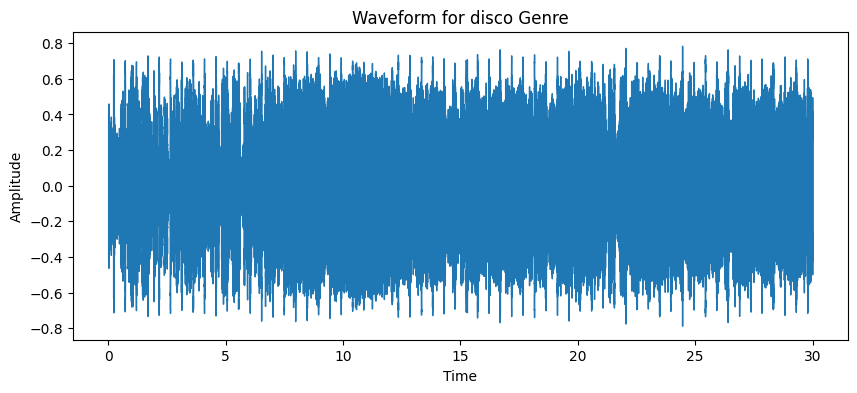

Plotting waveform for /content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/reggae/reggae.00000.wav...


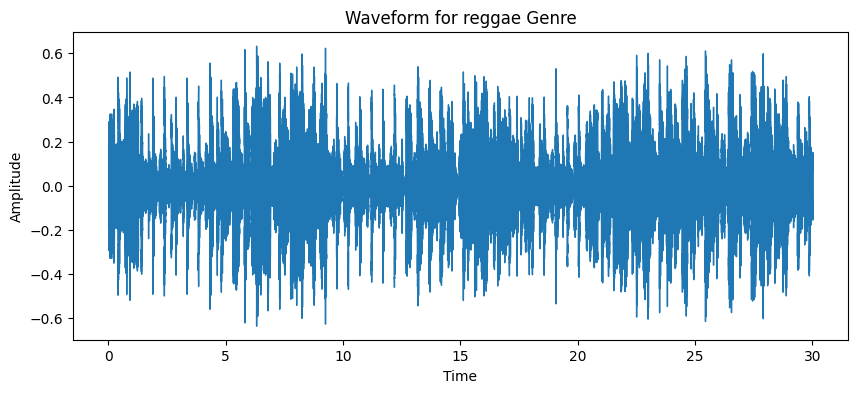

Plotting waveform for /content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/blues/blues.00001.wav...


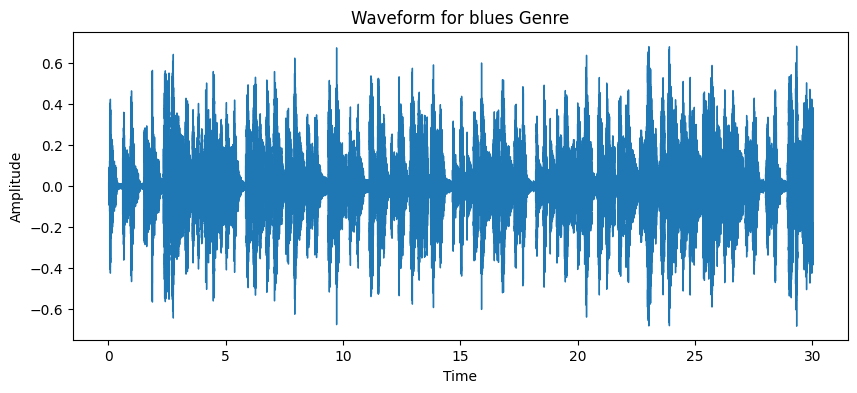

Plotting waveform for /content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/metal/metal.00006.wav...


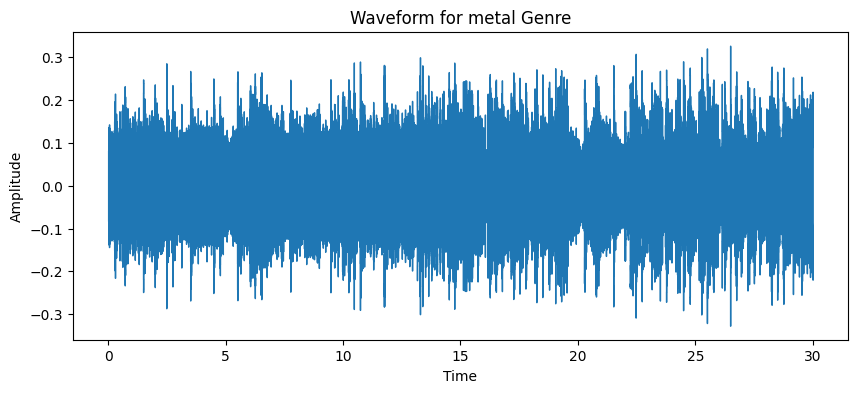

Plotting waveform for /content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/classical/classical.00000.wav...


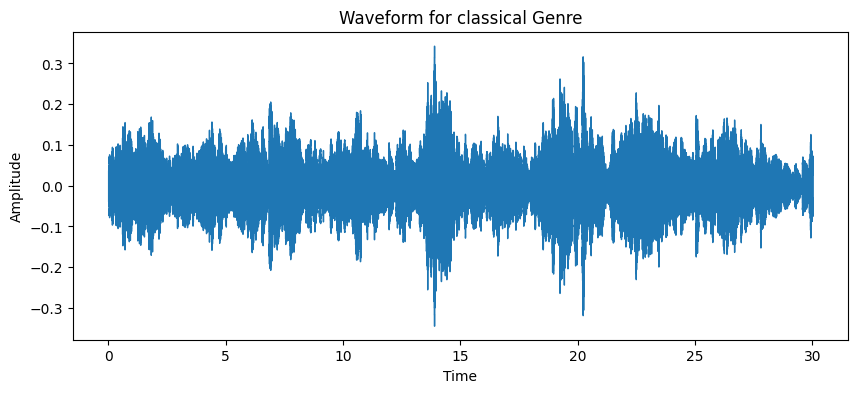

Plotting waveform for /content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/pop/pop.00000.wav...


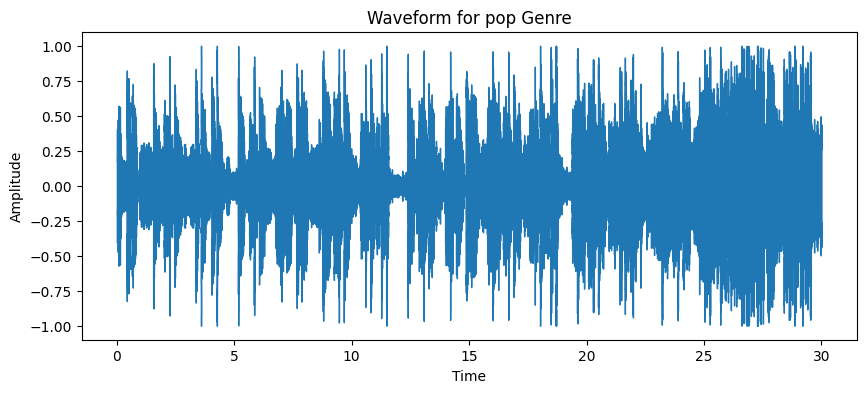

Plotting waveform for /content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/rock/rock.00002.wav...


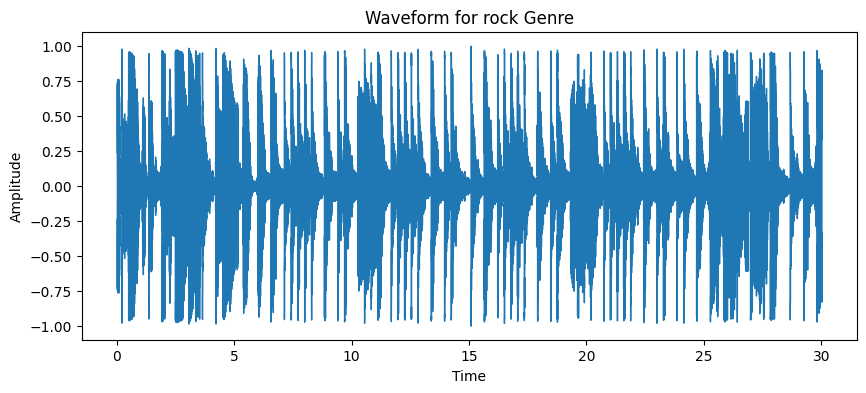

Plotting waveform for /content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/jazz/jazz.00000.wav...


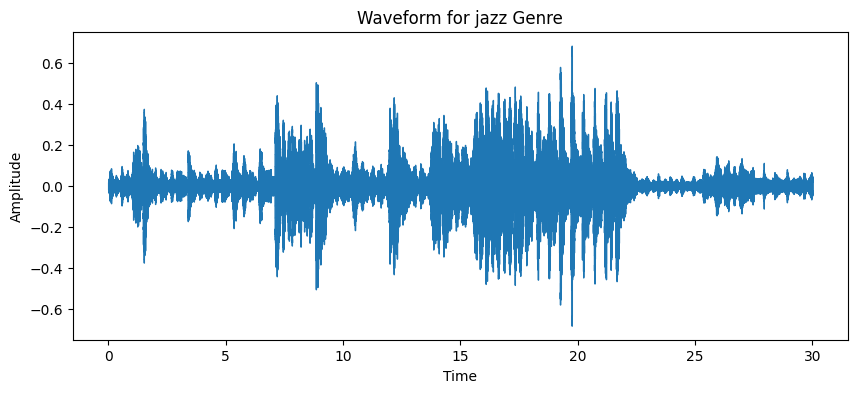

Plotting waveform for /content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/country/country.00000.wav...


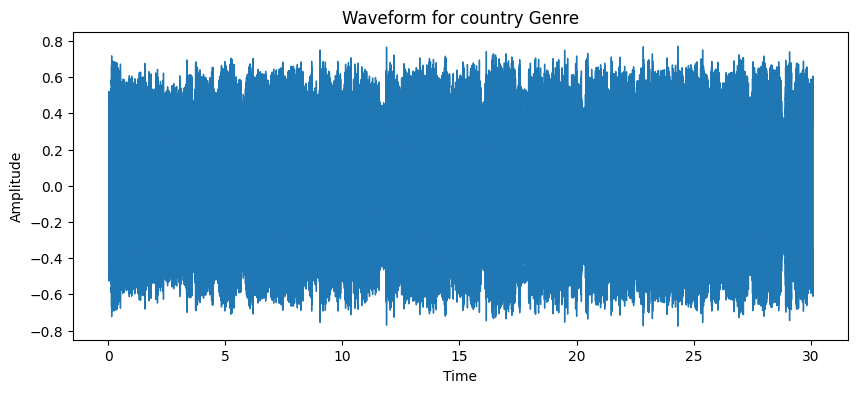

Plotting waveform for /content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/hiphop/hiphop.00002.wav...


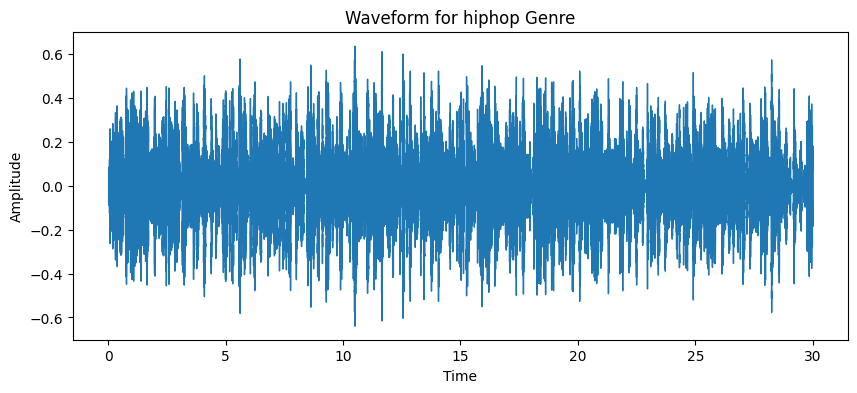

In [ ]:
base_dir = r"/content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original"
def plot_waveform(file_path, genre):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path)
        # Plot the waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f'Waveform for {genre} Genre')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Check if the base directory exists
if not os.path.exists(base_dir):
    print(f"The directory {base_dir} does not exist.")
else:
    print(f"Processing files in {base_dir}...")

# Iterate through each genre folder
for subdir, dirs, files in os.walk(base_dir):
    genre = os.path.basename(subdir)
    if files:
        # Try to plot the waveform for the first file in each genre folder
        file_path = os.path.join(subdir, files[0])
        print(f"Plotting waveform for {file_path}...")
        plot_waveform(file_path, genre)

<ipython-input-4-5ab2642c54fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');


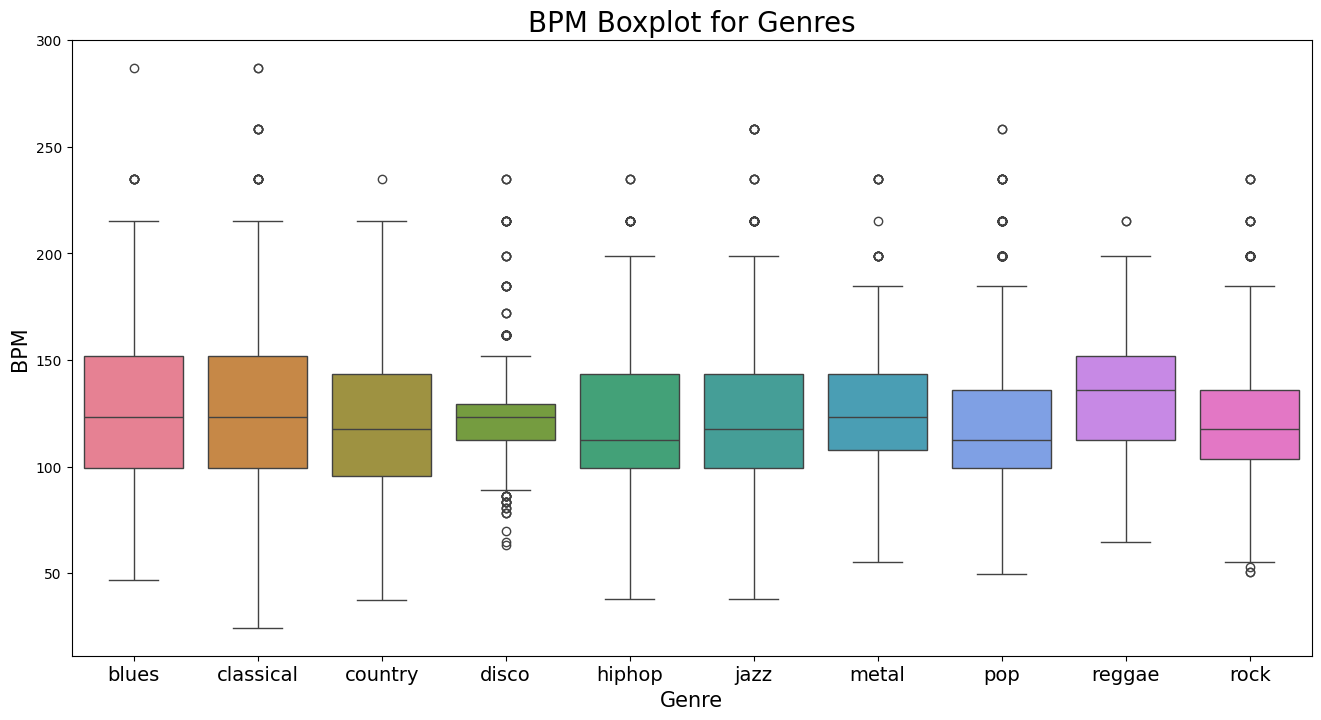

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/features_3_sec.csv')
x = df1[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

In [ ]:
df1 = df1.drop(labels='filename',axis=1)

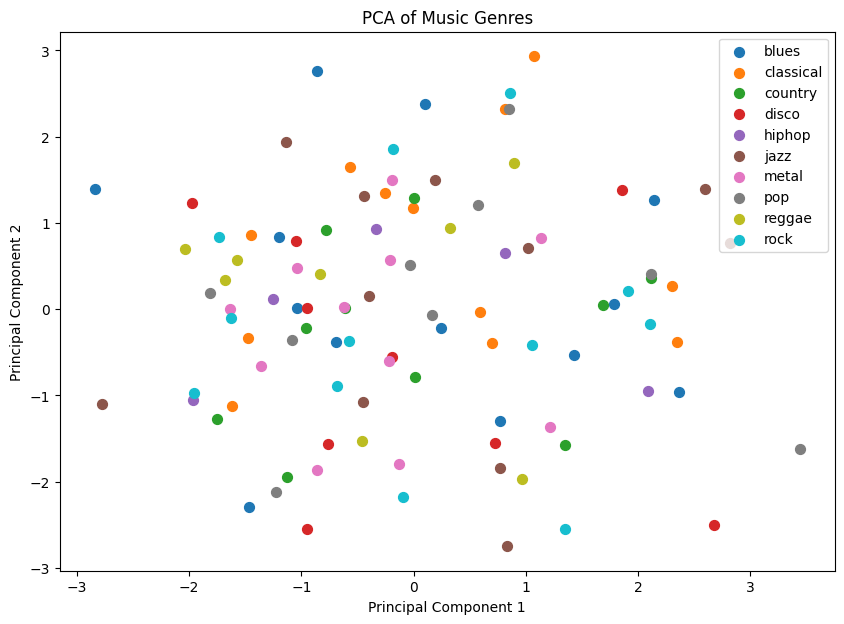

In [ ]:
features = np.random.rand(100, 20)

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_standardized)


labels = np.random.choice(df1['label'], 100)


# Unique genres in the dataset
unique_genres = np.unique(labels)

# Set up the plot
plt.figure(figsize=(10, 7))

# Plot each genre as a separate set of points
for genre in unique_genres:
    # Indices of songs belonging to the current genre
    idx = np.where(labels == genre)
    # Scatter plot for each genre
    plt.scatter(principal_components[idx, 0], principal_components[idx, 1], label=genre, s=50)

# Labeling the axes based on the principal components
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Music Genres')
plt.legend()
plt.show()


In [ ]:
audio = '/content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/hiphop/hiphop.00003.wav'
data , sr = librosa.load(audio)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
import IPython
IPython.display.Audio(data, rate=sr)

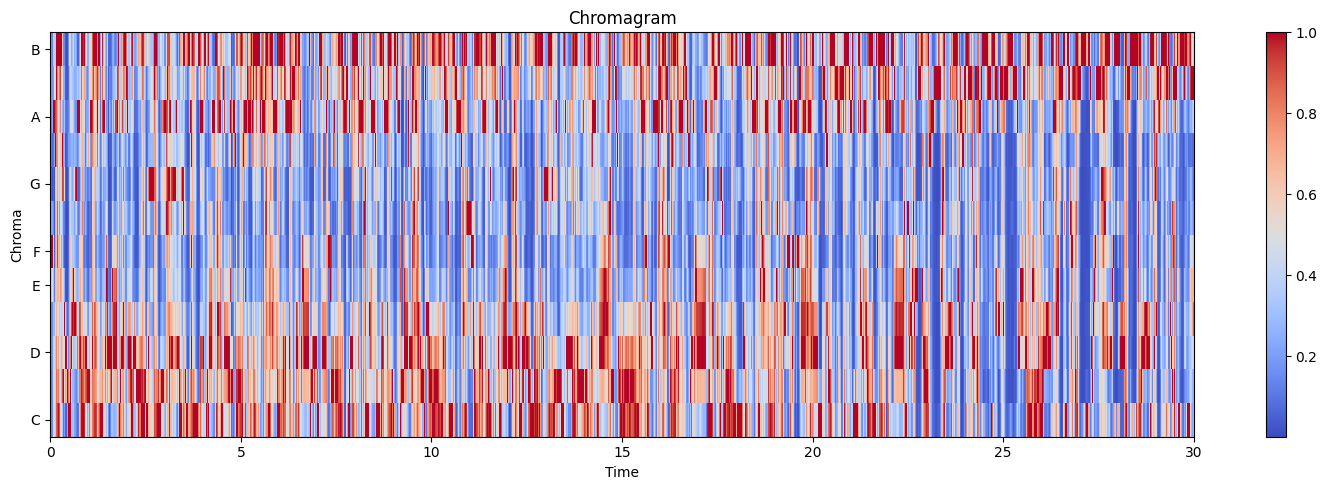

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Extract the chroma feature
chromagram = librosa.feature.chroma_stft(y=data, sr=sr)

# Plot the chromagram
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm', sr=sr)
plt.title('Chromagram')
plt.colorbar()
plt.ylabel('Chroma')
plt.xlabel('Time')
plt.tight_layout()
plt.show()


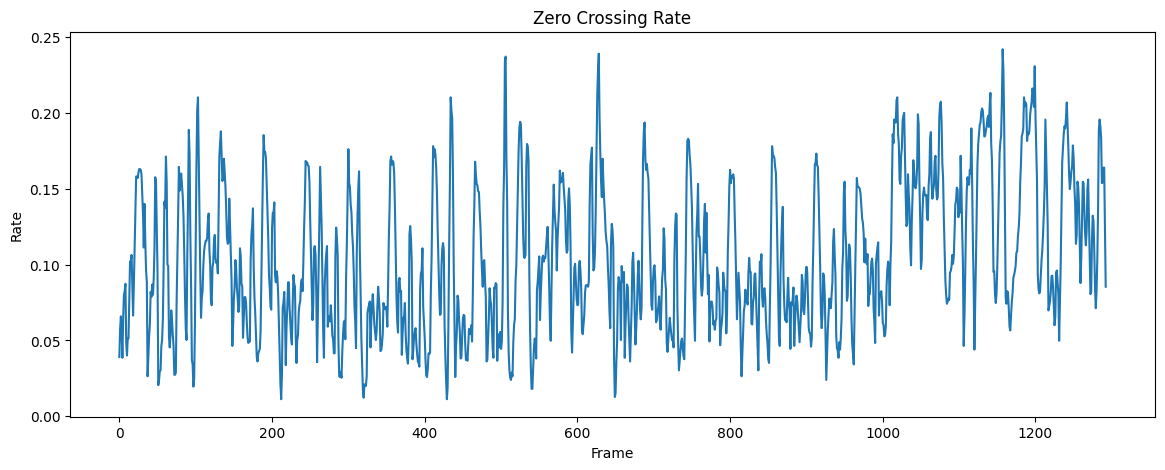

In [ ]:


# Assuming 'data' is your audio time series loaded from the previous step
# Calculate the zero-crossing rate
zero_crossings = librosa.feature.zero_crossing_rate(data)

# Plot the zero-crossing rate
plt.figure(figsize=(14, 5))
plt.plot(zero_crossings[0])
plt.title('Zero Crossing Rate')
plt.ylabel('Rate')
plt.xlabel('Frame')
plt.show()


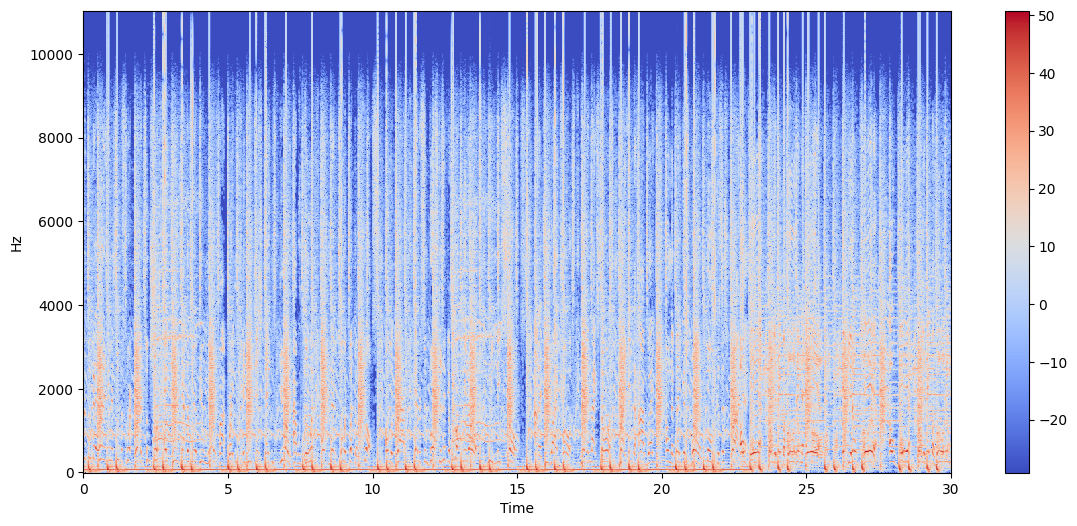

In [ ]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
df1.shape

(9990, 59)

In [ ]:
from sklearn.preprocessing import LabelEncoder

class_list = df1.iloc[:, -1]
label = LabelEncoder()
y = label.fit_transform(class_list)

In [ ]:
print(y)

[0 0 0 ... 9 9 9]


In [ ]:
print(df1.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [ ]:
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=42)

In [ ]:
def trainModel(model, epochs, optimizer):
  batch_size = 128
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  return model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs,batch_size=batch_size)

In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1], )),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),  # Output layer with 10 units for 10 classes
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
history = trainModel(model=model, epochs=40, optimizer='adam')

Epoch 1/40
53/53 [==============================] - 5s 9ms/step - loss: 1.6924 - accuracy: 0.3892 - val_loss: 1.1566 - val_accuracy: 0.6115
Epoch 2/40
53/53 [==============================] - 0s 5ms/step - loss: 1.1734 - accuracy: 0.5912 - val_loss: 0.8855 - val_accuracy: 0.7028
Epoch 3/40
53/53 [==============================] - 0s 5ms/step - loss: 0.9652 - accuracy: 0.6685 - val_loss: 0.7584 - val_accuracy: 0.7498
Epoch 4/40
53/53 [==============================] - 0s 5ms/step - loss: 0.8190 - accuracy: 0.7227 - val_loss: 0.6940 - val_accuracy: 0.7749
Epoch 5/40
53/53 [==============================] - 0s 5ms/step - loss: 0.7361 - accuracy: 0.7499 - val_loss: 0.6136 - val_accuracy: 0.8010
Epoch 6/40
53/53 [==============================] - 0s 5ms/step - loss: 0.6500 - accuracy: 0.7810 - val_loss: 0.5824 - val_accuracy: 0.8062
Epoch 7/40
53/53 [==============================] - 0s 5ms/step - loss: 0.5878 - accuracy: 0.8025 - val_loss: 0.5764 - val_accuracy: 0.8126
Epoch 8/40
53/53 [==

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is:",test_loss)
print("\nThe test accuracy is:",test_acc*100)

26/26 [==============================] - 0s 5ms/step - loss: 0.3583 - accuracy: 0.9078
The test loss is: 0.3583452105522156

The test accuracy is: 90.77949523925781


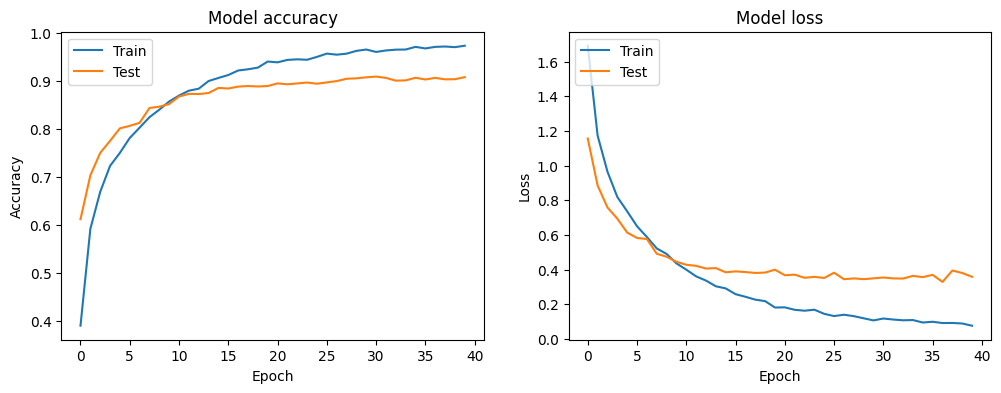

In [ ]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

# Assume 'history' is the return value from the 'fit' method
plot_history(history)


2nd Model

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def trainModel2(model, epochs, optimizer):
  batch_size = 256  # Increase batch size
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')

  # Add early stopping
  early_stopping = EarlyStopping(monitor='val_loss', patience=3)

  return model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

model2 = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1], )),
    Dropout(0.3),  # Increase dropout rate
    Dense(256, activation='relu'),
    Dropout(0.3),  # Increase dropout rate
    Dense(128, activation='relu'),
    Dropout(0.3),  # Increase dropout rate
    Dense(64, activation='relu'),
    Dropout(0.3),  # Increase dropout rate
    Dense(10, activation='softmax'),
])

# Use Adam optimizer with a smaller learning rate
optimizer = Adam(learning_rate=0.0001)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               30208     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [ ]:
history = trainModel2(model=model2, epochs=200, optimizer=optimizer)

Epoch 1/200
27/27 [==============================] - 3s 18ms/step - loss: 2.3146 - accuracy: 0.1369 - val_loss: 2.1922 - val_accuracy: 0.2854
Epoch 2/200
27/27 [==============================] - 0s 9ms/step - loss: 2.1950 - accuracy: 0.2199 - val_loss: 2.0732 - val_accuracy: 0.3254
Epoch 3/200
27/27 [==============================] - 0s 9ms/step - loss: 2.0783 - accuracy: 0.2773 - val_loss: 1.9354 - val_accuracy: 0.3491
Epoch 4/200
27/27 [==============================] - 0s 6ms/step - loss: 1.9793 - accuracy: 0.3121 - val_loss: 1.8111 - val_accuracy: 0.3573
Epoch 5/200
27/27 [==============================] - 0s 6ms/step - loss: 1.8887 - accuracy: 0.3300 - val_loss: 1.7137 - val_accuracy: 0.3864
Epoch 6/200
27/27 [==============================] - 0s 5ms/step - loss: 1.8312 - accuracy: 0.3463 - val_loss: 1.6334 - val_accuracy: 0.4246
Epoch 7/200
27/27 [==============================] - 0s 6ms/step - loss: 1.7599 - accuracy: 0.3713 - val_loss: 1.5616 - val_accuracy: 0.4556
Epoch 8/200


In [ ]:
test_loss2, test_acc2 = model2.evaluate(X_test, y_test, batch_size=128)
print("The test loss is:",test_loss2)
print("\nThe test accuracy is:",test_acc2*100)

26/26 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8929
The test loss is: 0.3626300096511841

The test accuracy is: 89.29329514503479


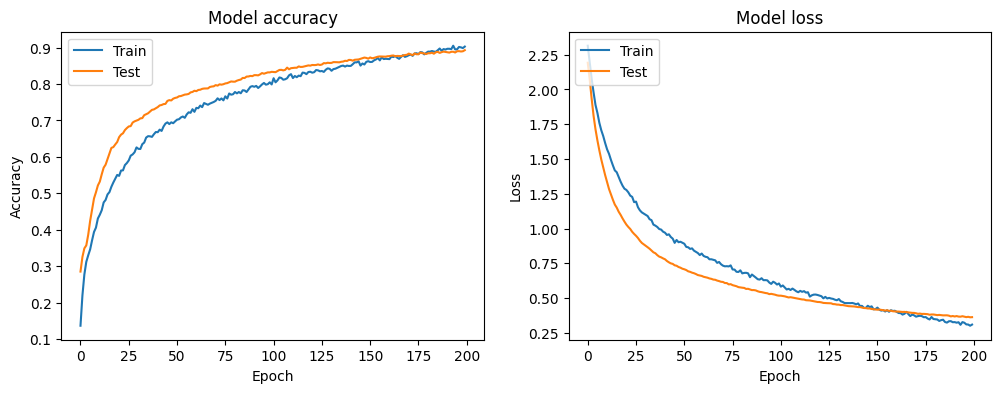

In [ ]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

plot_history(history)

CNN model

In [ ]:
file_path = '/content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/blues/blues.00000.wav'  # Update with an actual file path
y1, sr = librosa.load(file_path)
print(f"Audio length: {len(y1)}, Sample Rate: {sr}")

Audio length: 661794, Sample Rate: 22050


In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [ ]:
def audio_file_to_spectrogram(file_path, target_shape=(128, 128)):
    try:
        y, sr = librosa.load(file_path, sr=None)  # Load file with its original sample rate
        # Use keyword arguments for melspectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512)
        S_dB = librosa.power_to_db(S, ref=np.max)
        # Resize spectrogram to target shape
        S_resized = resize(S_dB, target_shape, mode='constant', anti_aliasing=True)
        return S_resized[:, :, np.newaxis]  # Add channel dimension
    except Exception as e:
        print(f"Error processing file {file_path}: {str(e)}")
        return None

In [ ]:
import random
def load_data_sample(base_dir, sample_size=100, target_shape=(128, 128)):
    X, y = [], []
    genre_paths = [os.path.join(base_dir, genre) for genre in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, genre))]

    for genre_path in genre_paths:
        files = [f for f in os.listdir(genre_path) if f.endswith('.wav')]
        sampled_files = random.sample(files, min(len(files), sample_size))

        for file in sampled_files:
            file_path = os.path.join(genre_path, file)
            spectrogram = audio_file_to_spectrogram(file_path, target_shape)
            if spectrogram is not None:
                X.append(spectrogram)
                y.append(os.path.basename(genre_path))

    return np.array(X), np.array(y)

In [ ]:
def prepare_labels(y):
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    return to_categorical(y_encoded)

def split_data(X, y, test_size=0.2):
    return train_test_split(X, y, test_size=test_size, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode genre labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df1['label'])  # 'label' is the column with genre labels
y = to_categorical(encoded_labels)

In [ ]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
base_dir = '/content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original'
X, y = load_data_sample(base_dir)
y_categorical = prepare_labels(y)
X_train, X_test, y_train, y_test = split_data(X, y_categorical)

<ipython-input-23-bf9e1db79ffc>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)  # Load file with its original sample rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing file /content/drive/MyDrive/SP24/Deep learning/Deep learning project/Music Genere Dataset/Data/genres_original/jazz/jazz.00054.wav: 


In [ ]:
#X = np.squeeze(X, axis=-1)  # This removes the last dimension if it is 1
print("New shape of training data:", X.shape)

New shape of training data: (998, 128, 128, 1)


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
print("Shape of training data:", X_train.shape)
print("Shape of one sample:", X_train[0].shape)

Shape of training data: (798, 128, 128, 1)
Shape of one sample: (128, 128, 1)


In [ ]:
model = create_cnn_model((128, 128, 1), y_train.shape[1])
model.summary()

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)      

7/7 - 0s - loss: 1.5716 - accuracy: 0.5100 - 409ms/epoch - 58ms/step
Test accuracy: 0.5100, Test loss: 1.5716


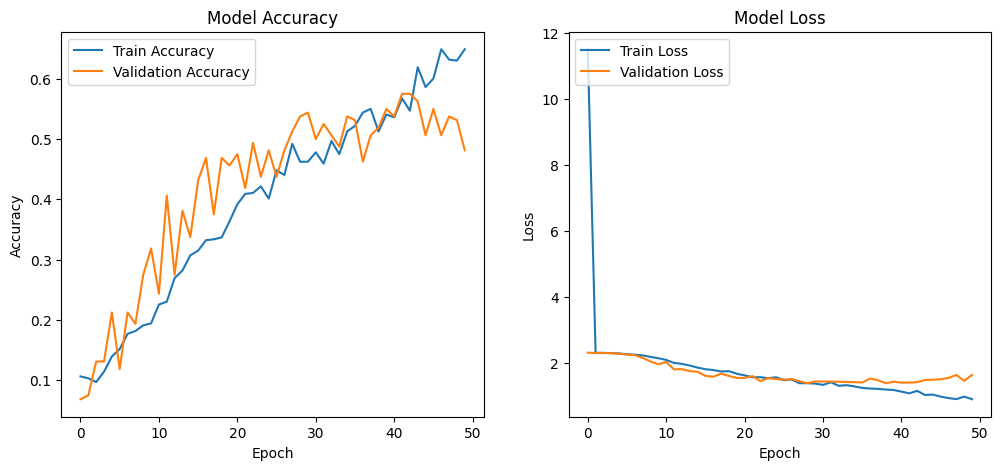

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}')

# Visualization of training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()


Supervised Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
#features = df1.drop('label', axis=1).values  # Assuming 'label' is the column with your target labels
#labels = df1['label'].values

# Standardize the features
#scaler = StandardScaler()
#features_standardized = scaler.fit_transform(features)

#pca = PCA(n_components=2)
#principal_components = pca.fit_transform(features_standardized)

# Convert labels to a numerical format
#label_encoder = LabelEncoder()
#labels_encoded = label_encoder.fit_transform(labels)

In [ ]:
features = df1.drop('label', axis=1)  # 'label' column should be the target variable
labels = df1['label']

# Optionally, standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
print("Shape of training data:", X_train.shape)
print("Shape of one sample:", X_train[0].shape)

Shape of training data: (7992, 58)
Shape of one sample: (58,)


In [ ]:
# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust these parameters

# Fit the model on the training data
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
predictions = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_test, predictions))

Accuracy of the model: 88.29%
              precision    recall  f1-score   support

       blues       0.87      0.87      0.87       208
   classical       0.94      0.98      0.96       203
     country       0.80      0.84      0.82       186
       disco       0.85      0.83      0.84       199
      hiphop       0.92      0.89      0.90       218
        jazz       0.86      0.93      0.89       192
       metal       0.87      0.95      0.91       204
         pop       0.92      0.95      0.93       180
      reggae       0.92      0.88      0.90       211
        rock       0.89      0.72      0.79       197

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998

